# **1. Perkenalan Dataset**


# Credit Card Consumen

**1. Sumber Dataset:**
   Dataset ini diperoleh dari sumber Kaggle

**2. Ketentuan Dataset:**
   - Tanpa Label: Dataset ini tidak memiliki label atau kelas
   - Jumlah Baris: Dataset ini memiliki 10127 baris dan 19 kolom
   - Tipe Data: Dataset ini memiliki dara kategorikal dan numerikal, seperti
     berikut:
        - *Kategorikal* : Gender, Education_Level, Marital_Status,   
          Income_Category, Card_Category
        - *Numerikal* : Customer_Age, Dependent_count, Months_on_book,
          Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio


# **2. Import Library**

In [136]:
# EDA Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from scipy.spatial import ConvexHull

# Data Preprocessing Libraries
!pip install datasist
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler

# Machine Learing (classification models) Libraries
from platform import python_version
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# **3. Memuat Dataset**

In [137]:
df = pd.read_csv("BankChurners_Datasets.csv")
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **4. Exploratory Data Analysis (EDA)**

### 1. Memahami Struktur Data

In [138]:
# Periksa dimensi dataset (jumlah baris dan kolom)
print('DataFrame Composition:\nColumns: {} \nRows: {}'.format(df.shape[1],df.shape[0]))

DataFrame Composition:
Columns: 19 
Rows: 10127


In [139]:
# Tinjau jenis data di setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

### 2. Menangani Data yang Hilang

In [140]:
# # Identifikasi nilai yang hilang (missing values)
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
Customer_Age,int64,45,0
Gender,object,2,0
Dependent_count,int64,6,0
Education_Level,object,7,0
Marital_Status,object,4,0
Income_Category,object,6,0
Card_Category,object,4,0
Months_on_book,int64,44,0
Total_Relationship_Count,int64,6,0
Months_Inactive_12_mon,int64,7,0


In [141]:
# Identifikasi nilai duplikat
df.duplicated().sum()

0

### 3. Analisis Distribusi dan Korelasi

In [142]:
# Menampilkan statistik deskriptif untuk variabel numerik
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


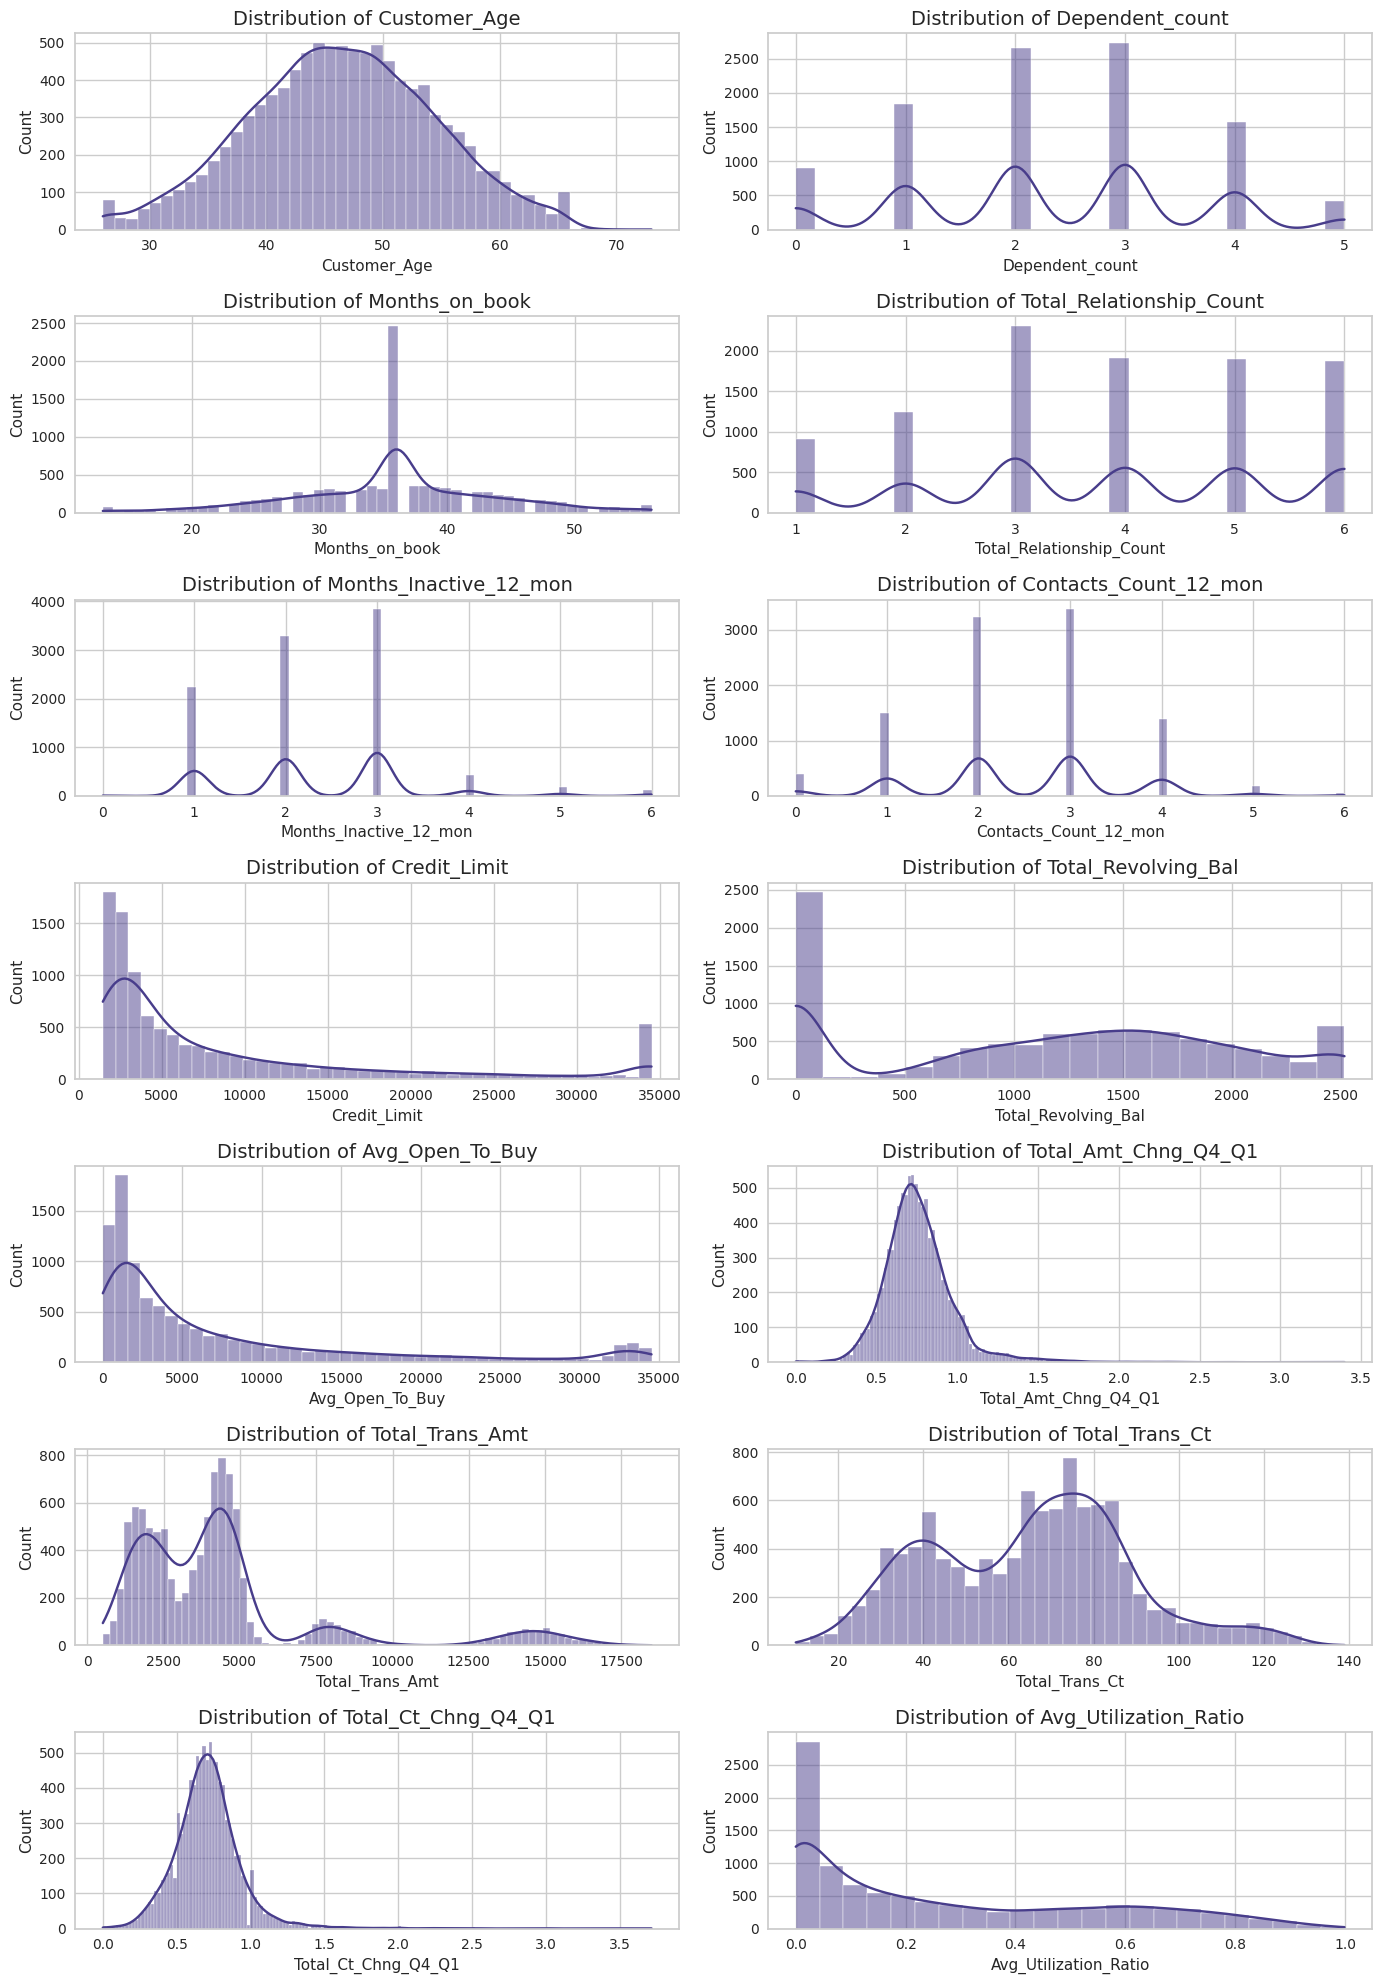

In [143]:
# Visualisasi distribusi variabel numerik menggunakan histogram
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(7, 2, figsize=(14, 20))

for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col], color='darkslateblue')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14)

for i in range(len(numeric_columns), 7 * 2):
    row = i // 2
    col = i % 2
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

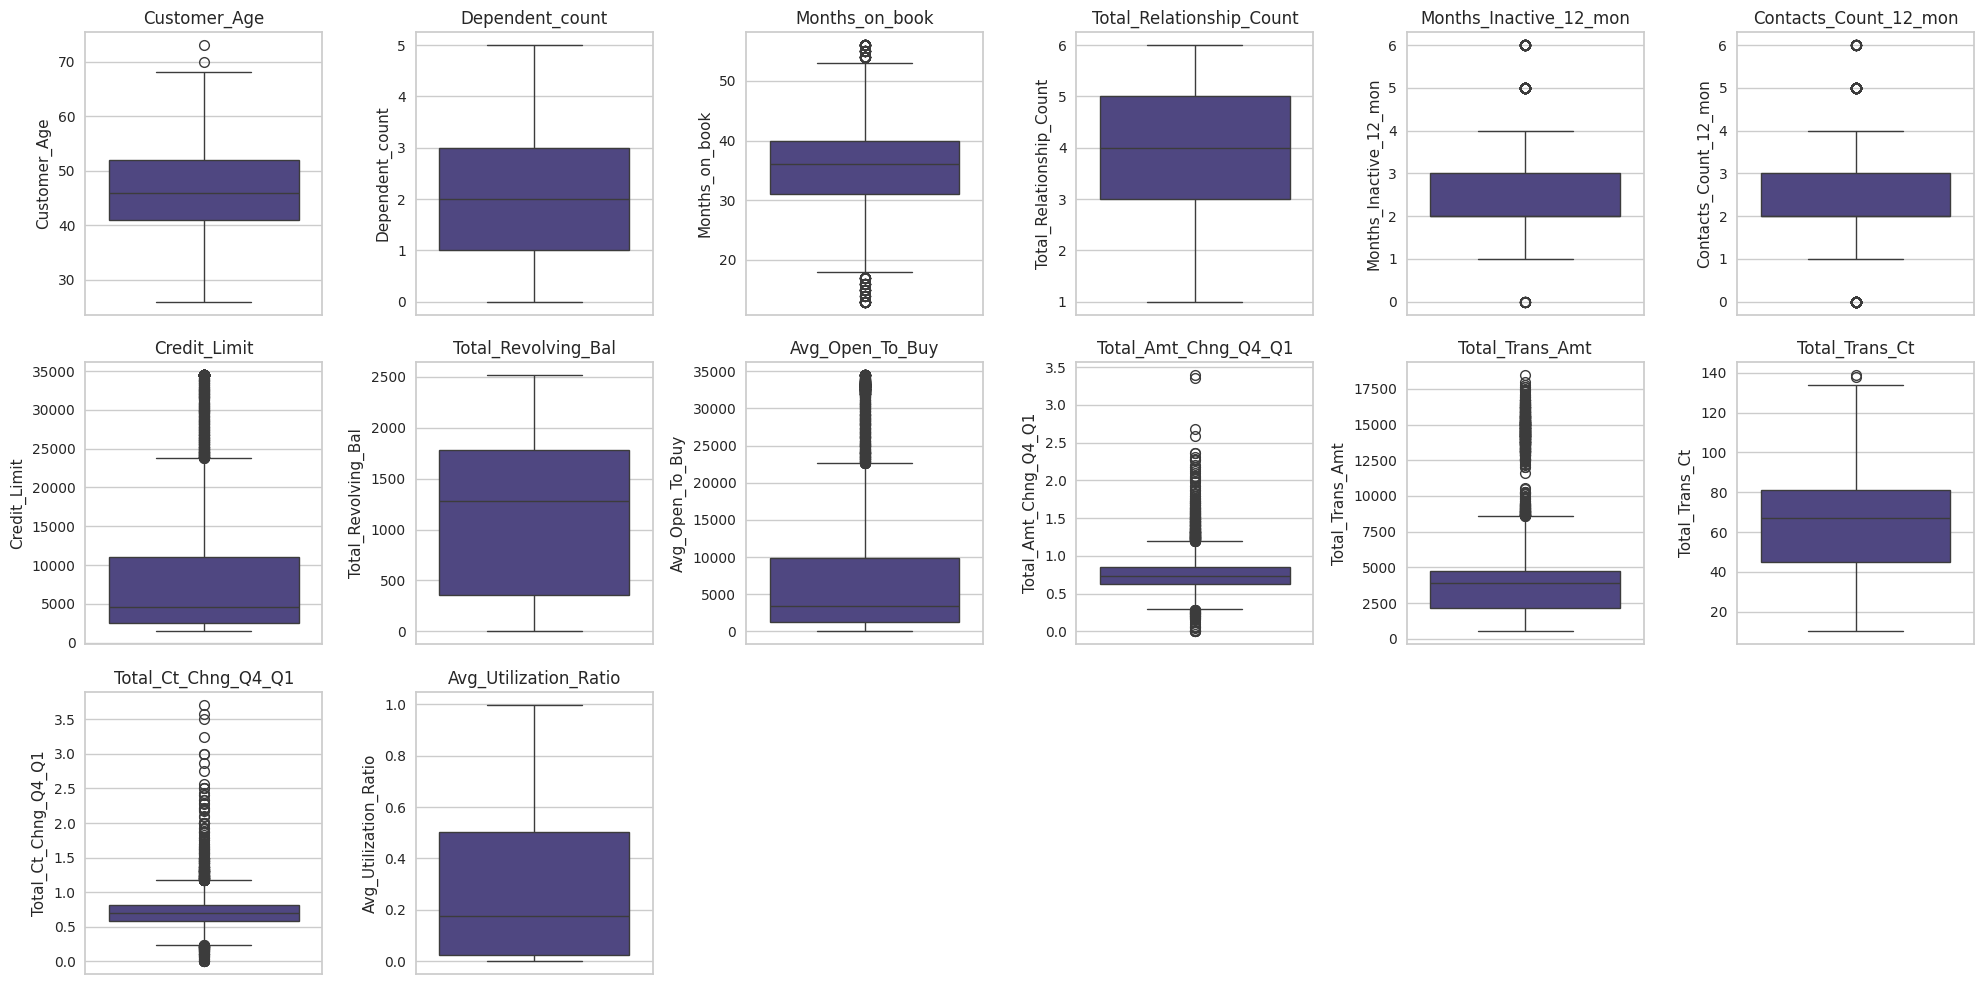

In [144]:
# Visualisasi distribusi variabel numerik menggunakan boxplot
plt.figure(figsize=(20, 10))

for i, column in enumerate(df.select_dtypes(include = ['int64','float64'])):
    plt.subplot(3,6 , i + 1)
    sns.boxplot(y=column, data=df, color='darkslateblue')
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [145]:
# Menghitung matriks korelasi
corr = df[numeric_columns].corr()
corr

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


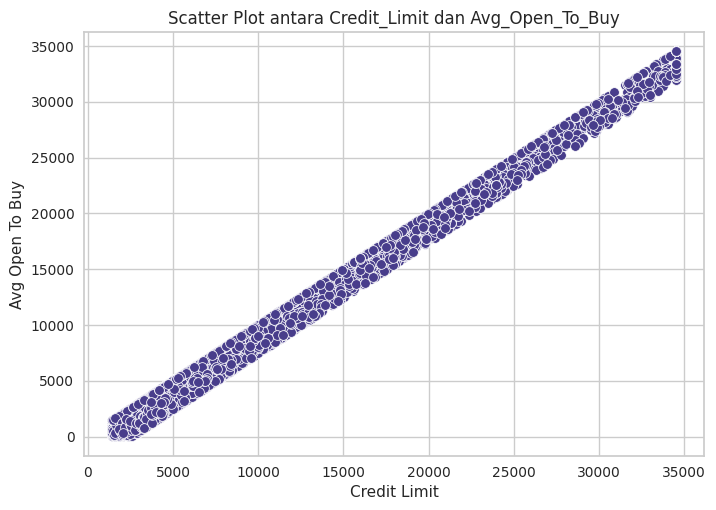

In [146]:
# Scatter plot antara 'Credit_Limit' dan 'Avg_Open_To_Buy' (korelasi 0.996038)
sns.scatterplot(x='Credit_Limit', y='Avg_Open_To_Buy', data=df, color='darkslateblue')
plt.title('Scatter Plot antara Credit_Limit dan Avg_Open_To_Buy')
plt.xlabel('Credit Limit')
plt.ylabel('Avg Open To Buy')
plt.show()

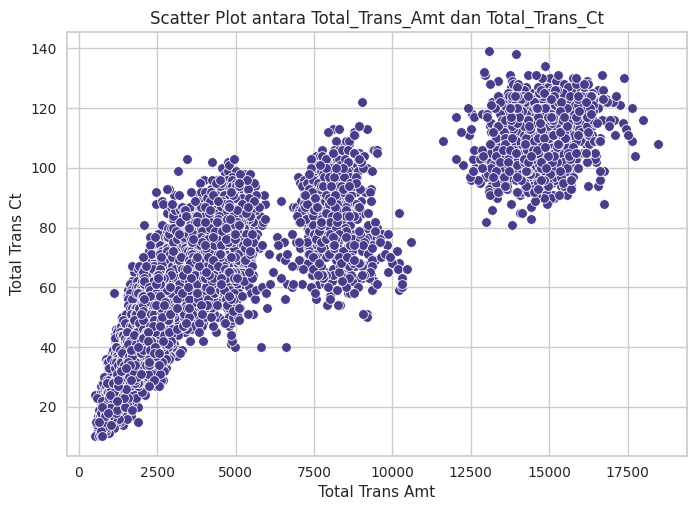

In [147]:
# Scatter plot antara 'Total_Trans_Amt' dan 'Total_Trans_Ct' (korelasi 0.810049)
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=df, color='darkslateblue')
plt.title('Scatter Plot antara Total_Trans_Amt dan Total_Trans_Ct')
plt.xlabel('Total Trans Amt')
plt.ylabel('Total Trans Ct')
plt.show()

### 4. Visualisasi Data

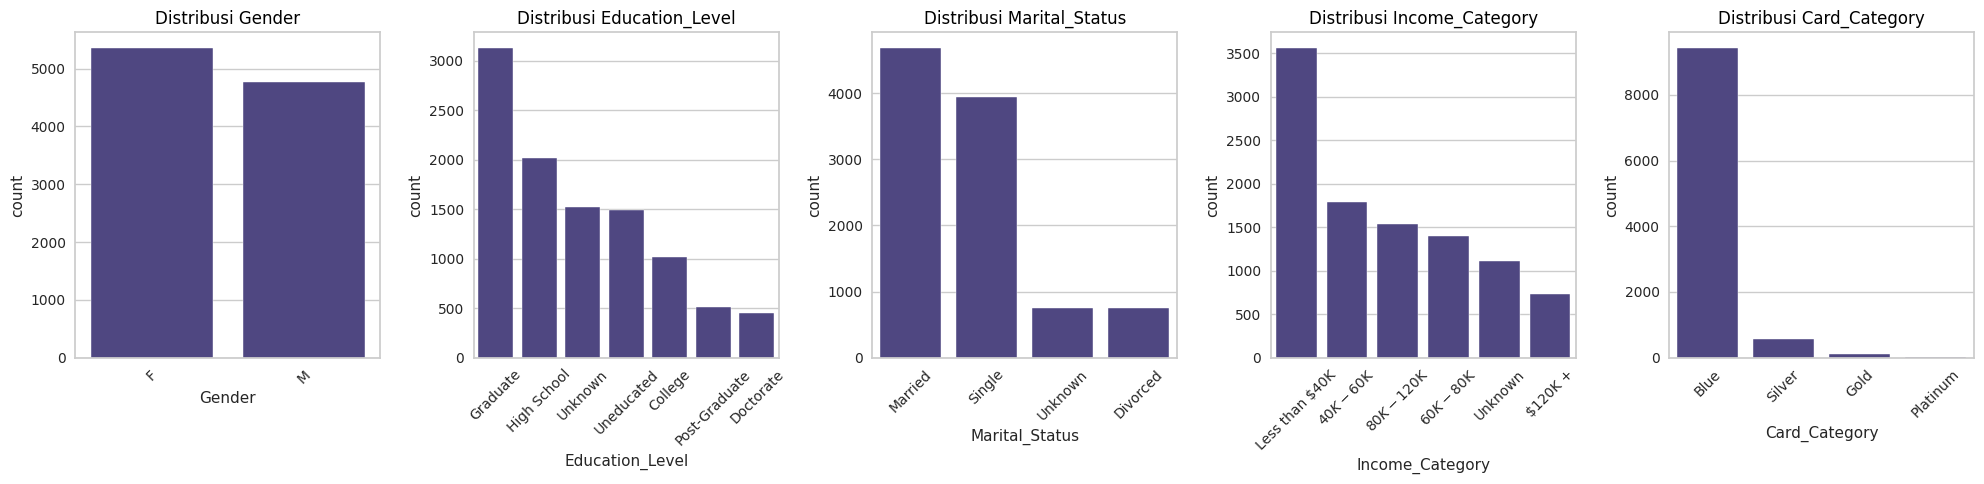

In [148]:
# Visualisasi untuk kolom kategorikal
categorical_columns = ['Gender', 'Education_Level',
                       'Marital_Status', 'Income_Category', 'Card_Category']

plt.figure(figsize=(20, 5))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, color='darkslateblue')
    plt.title(f'Distribusi {col}', color='black')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

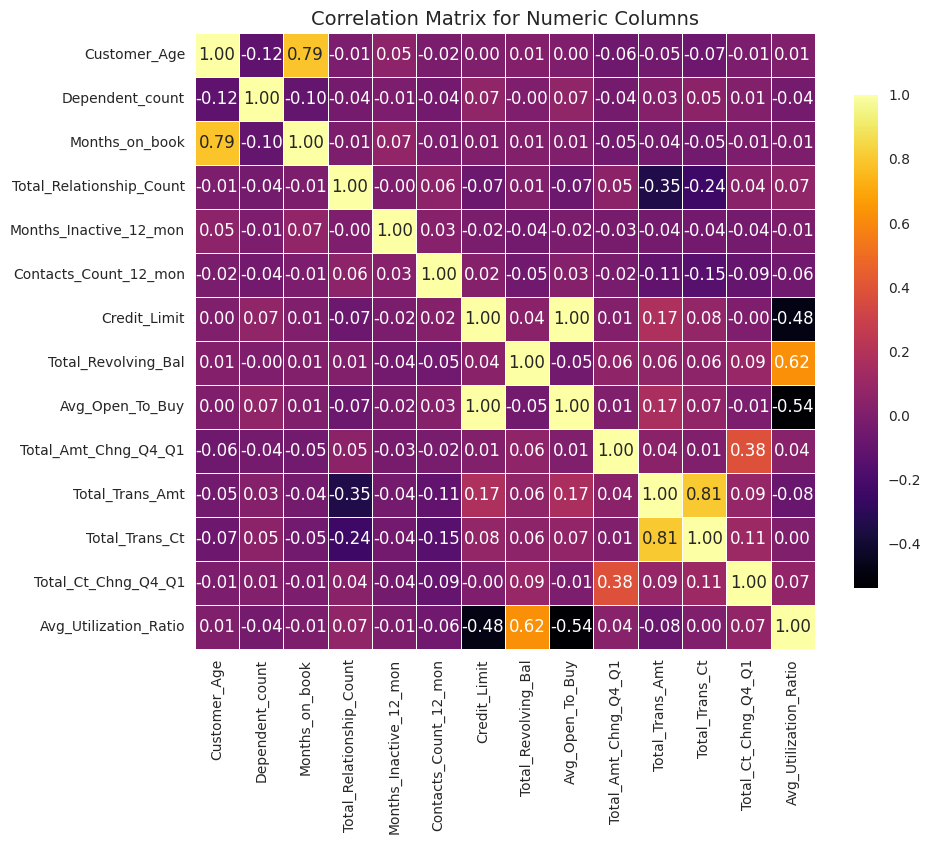

In [149]:
# Visualisasi untuk menampilkan matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='inferno', fmt=".2f", linewidths=.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix for Numeric Columns', fontsize=14)
plt.show()

# **5. Data Preprocessing**

### 1. Menghapus atau Mengganti Kolom yang Tidak Relevan

In [150]:
# Drop values "Unknown"pada kolom 'Income_Category'
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

In [151]:
# Menggantikan semua nilai 'Divorced' dengan 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single')

### 2. Normalisasi Fitur

In [152]:
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,M,0.6,High School,Married,$60K - $80K,Blue,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0.489362,F,1.0,Graduate,Single,Less than $40K,Blue,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0.531915,M,0.6,Graduate,Married,$80K - $120K,Blue,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,0.297872,F,0.8,High School,Unknown,Less than $40K,Blue,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761
4,0.297872,M,0.6,Uneducated,Married,$60K - $80K,Blue,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000


### 3. Deteksi dan Penanganan Outlier

In [153]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_IQR(df):
    outlier_indices = []
    for col in df.select_dtypes(include=['int64', 'float64']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return set(outlier_indices)

outliers = detect_outliers_IQR(df)
df = df.drop(index=outliers)

print(f'Data After Removing Outliers: {df.shape}')

Data After Removing Outliers: (5909, 19)


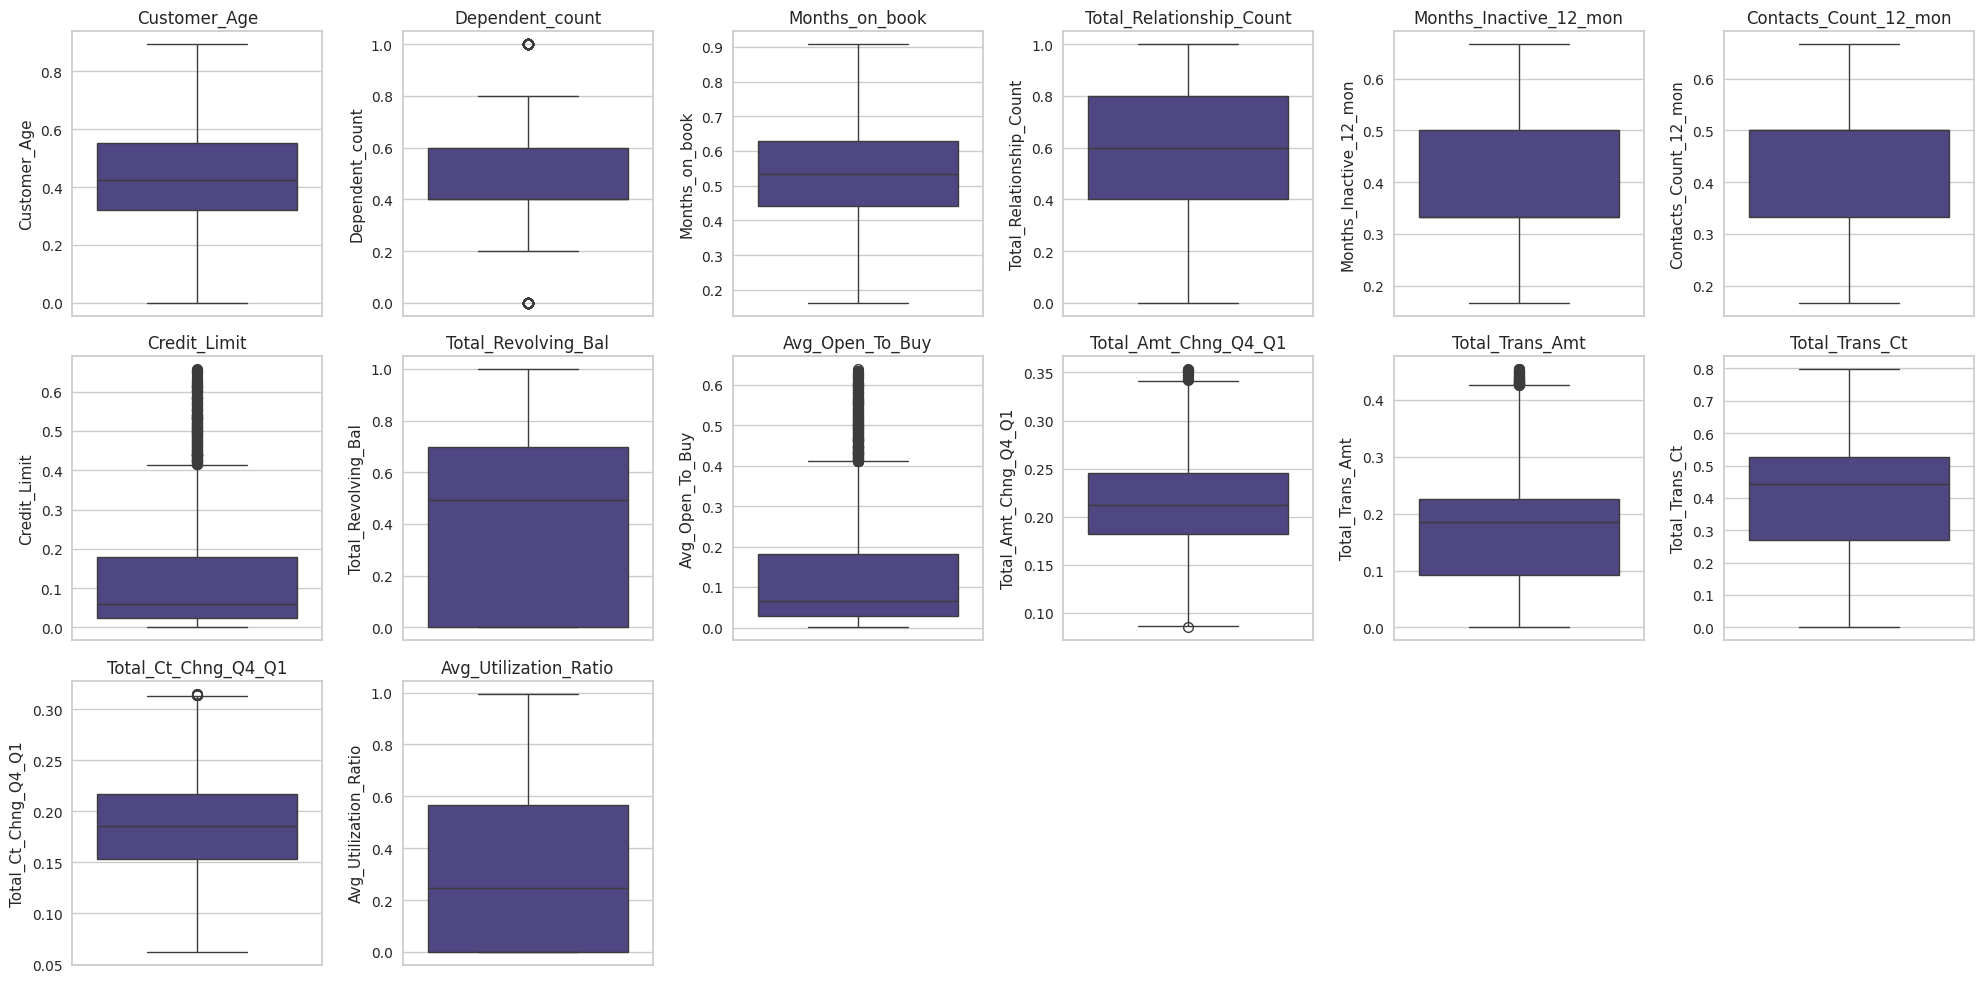

In [154]:
# Visualisasi distribusi variabel numerik menggunakan boxplot setelah menghapus outliers
plt.figure(figsize=(20, 10))

for i, column in enumerate(df.select_dtypes(include=['int64', 'float64'])):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y=column, data=df, color='darkslateblue')
    plt.title(f'{column}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

### 4. Encoding Data Kategorikal

In [155]:
# Kolom yang tidak ordinal dan ordinal
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
non_ordinal_columns = ['Gender', 'Marital_Status']
ordinal_columns = ['Education_Level', 'Income_Category', 'Card_Category']

# 1. One-Hot Encoding untuk kolom non-ordinal
df_encoded_non_ordinal = pd.get_dummies(df[non_ordinal_columns], drop_first=True).astype(int)

# 2. Label Encoding untuk kolom ordinal
label_encoder = LabelEncoder()
df_encoded_ordinal = df[ordinal_columns].apply(label_encoder.fit_transform)

df[df_encoded_non_ordinal.columns] = df_encoded_non_ordinal
df[df_encoded_ordinal.columns] = df_encoded_ordinal

df.drop(columns=non_ordinal_columns + ordinal_columns, inplace=True)
df.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Single,Marital_Status_Unknown
10,0.340426,1.0,0.418605,0.8,0.500000,0.333333,0.160522,0.582837,0.152928,0.244628,0.038444,0.248062,0.183091,0.217217,1,0,1
14,0.659574,0.4,0.813953,0.8,0.333333,0.333333,0.030162,0.270163,0.050792,0.350309,0.058974,0.147287,0.164513,0.279279,0,0,0
21,0.765957,0.0,0.837209,0.2,0.500000,0.500000,0.000000,0.000000,0.041587,0.308213,0.010126,0.046512,0.161551,0.000000,0,0,0
23,0.446809,0.8,0.534884,0.4,0.500000,0.333333,0.031855,0.619785,0.026917,0.168678,0.034272,0.100775,0.095046,0.626627,0,1,0
24,0.595745,0.4,0.674419,0.6,0.333333,0.500000,0.325860,0.000000,0.353896,0.316456,0.033382,0.085271,0.201939,0.000000,1,0,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

### K-Means Clustering

In [156]:
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

df['KMeans_Cluster'] = kmeans_labels
df['KMeans_Cluster'].value_counts()

,count
KMeans_Cluster,
0,2662
1,1714
2,1533


## **b. Evaluasi Model Clustering**

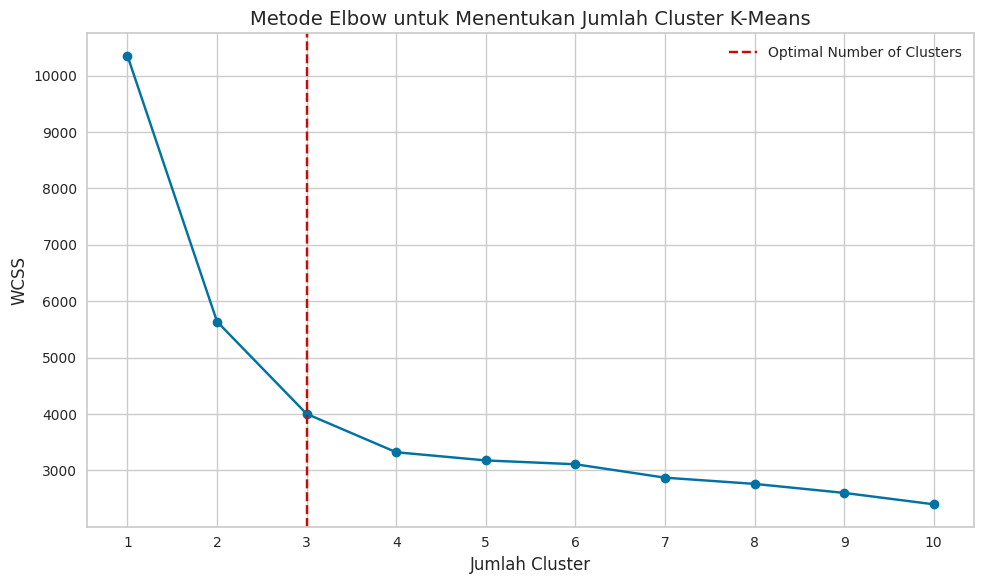

In [157]:
# Visualisasi Elbow untuk menentukan jumlah cluster optimal
n_clusters = range(1, 11)
wcss = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, wcss, marker='o', color='b', linestyle='-')
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster K-Means', fontsize=14)
plt.grid(True)
plt.xticks(n_clusters)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [159]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(df, kmeans_labels)

# Menghitung Davies-Bouldin Score
kmeans_db_score = davies_bouldin_score(df, kmeans_labels)

# Menyusun hasil clustering
clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette],
    'Davies-Bouldin Score': [kmeans_db_score]
})

clustering_scores

,Clustering Method,Silhouette Score,Davies-Bouldin Score
0,K-Means,0.391911,1.069202


## **c. Feature Selection (Opsional)**

In [160]:
# Menggunakan PCA untuk mengurangi dimensionalitas
pca = PCA(n_components=2, random_state=42)
df_pca = pd.DataFrame(
    pca.fit_transform(df),
    columns=['PC1', 'PC2']
)

df_pca.head()

,PC1,PC2
0,-1.083835,-0.403095
1,0.289297,-0.558561
2,0.280018,-0.484534
3,1.358662,0.267389
4,-1.091874,-0.113445


In [161]:
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
km_labels = kmeans.fit_predict(df_pca)

df['KMeans_Cluster'] = km_labels
df['KMeans_Cluster'].value_counts()

,count
KMeans_Cluster,
0,2662
1,1714
2,1533


In [162]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(df_pca, kmeans_labels)

# Menghitung Davies-Bouldin Score
kmeans_db_score = davies_bouldin_score(df_pca, kmeans_labels)

clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette],
    'Davies-Bouldin Score': [kmeans_db_score]
})

clustering_scores

,Clustering Method,Silhouette Score,Davies-Bouldin Score
0,K-Means,0.80365,0.331093


## **d. Visualisasi Hasil Clustering**

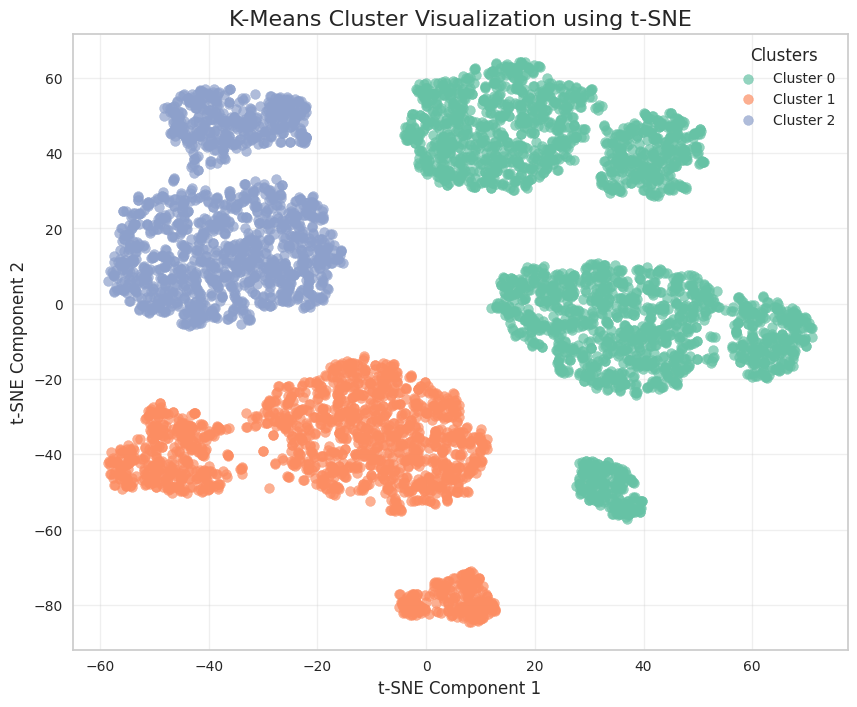

In [163]:
# Visualisasi hasil K-Means clustering menggunakan T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df.drop(columns=['KMeans_Cluster']))

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set2", n_colors=4)

for cluster in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    cluster_tsne = tsne_results[df['KMeans_Cluster'] == cluster]
    plt.scatter(
        cluster_tsne[:, 0], cluster_tsne[:, 1],
        label=f"Cluster {cluster}",
        color=color_palette[cluster],
        alpha=0.7,
        s=50
    )

plt.title("K-Means Cluster Visualization using t-SNE", fontsize=16)
plt.xlabel("t-SNE Component 1", fontsize=12)
plt.ylabel("t-SNE Component 2", fontsize=12)
plt.legend(title="Clusters", loc="upper right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


## **d. Analisis dan Interpretasi Hasil Cluster**

### 1. Menyusun Statistik Deskriptif untuk Tiap Cluster

In [164]:
# Menyusun statistik deskriptif berdasarkan cluster
cluster_stats = df.groupby('KMeans_Cluster').describe()

print(cluster_stats)

               Customer_Age                                               \
                      count      mean       std  min       25%       50%   
KMeans_Cluster                                                             
0                    2662.0  0.430168  0.156800  0.0  0.319149  0.425532   
1                    1714.0  0.443680  0.147144  0.0  0.340426  0.446809   
2                    1533.0  0.428669  0.155380  0.0  0.319149  0.425532   

                                   Dependent_count            ...  \
                     75%       max           count      mean  ...   
KMeans_Cluster                                                ...   
0               0.531915  0.893617          2662.0  0.483396  ...   
1               0.553191  0.829787          1714.0  0.485298  ...   
2               0.553191  0.829787          1533.0  0.483235  ...   

               Marital_Status_Single      Marital_Status_Unknown            \
                                 75%  max         

In [170]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Single,Marital_Status_Unknown,KMeans_Cluster
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000
mean,0.433698,0.483906,0.534549,0.588729,0.378914,0.416935,0.127415,0.451913,0.130746,0.214399,0.171790,0.408340,0.185031,0.314937,0.450499,0.464038,0.076663,0.808936
std,0.153796,0.252476,0.154854,0.301589,0.142783,0.154961,0.149319,0.323923,0.143660,0.048410,0.090669,0.151532,0.048311,0.285194,0.497586,0.498747,0.266078,0.820696
min,0.000000,0.000000,0.162791,0.000000,0.166667,0.166667,0.000000,0.000000,0.000203,0.085075,0.000000,0.000000,0.062197,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319149,0.400000,0.441860,0.400000,0.333333,0.333333,0.024932,0.000000,0.029438,0.181925,0.092745,0.271318,0.152935,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425532,0.400000,0.534884,0.600000,0.333333,0.500000,0.059699,0.494239,0.065946,0.211952,0.186158,0.441860,0.185245,0.248248,0.000000,0.000000,0.000000,1.000000
75%,0.553191,0.600000,0.627907,0.800000,0.500000,0.500000,0.180566,0.698848,0.182250,0.245805,0.226271,0.527132,0.217017,0.566567,1.000000,1.000000,0.000000,2.000000
max,0.893617,1.000000,0.906977,1.000000,0.666667,0.666667,0.658168,1.000000,0.639498,0.353547,0.454379,0.798450,0.315293,0.995996,1.000000,1.000000,1.000000,2.000000


### 2. Hasil Interpretasi Setiap Cluster

Tulis hasil interpretasinya di sini.
1. Cluster 0:
   - Usia Pelanggan (Customer_Age): Rata-rata 0.4337 (skala antara 0 dan 1).
   - Jumlah Tanggungan (Dependent_count): Rata-rata 0.4839.
   - Durasi Berlangganan (Months_on_book): Rata-rata 0.5345.
   - Pendapatan (Credit_Limit): Rata-rata 0.1274.
   - Skor Belanja (Total_Trans_Amt): Rata-rata 0.1718.
   - Interpretasi: Pelanggan dalam cluster ini memiliki usia pelanggan, jumlah tanggungan, dan durasi berlangganan yang moderat. Namun, mereka memiliki pendapatan dan skor belanja yang rendah. Cluster ini cenderung mencerminkan pelanggan dengan keterlibatan transaksi yang minimal dan penggunaan kredit rendah.

2. Cluster 1:
   - Usia Pelanggan (Customer_Age): Rata-rata 0.4519.
   - Jumlah Tanggungan (Dependent_count): Rata-rata 0.4169.
   - Durasi Berlangganan (Months_on_book): Rata-rata 0.5887.
   - Pendapatan (Credit_Limit): Rata-rata 0.4519.
   - Skor Belanja (Total_Trans_Amt): Rata-rata 0.4083.
   - Interpretasi: Cluster ini menunjukkan pelanggan dengan usia dan tanggungan yang moderat, tetapi dengan durasi berlangganan lebih lama dibandingkan Cluster 0. Pendapatan dan skor belanja juga berada pada tingkat sedang, mencerminkan pelanggan dengan keterlibatan transaksi yang lebih tinggi dibandingkan cluster sebelumnya.


3. Cluster 3:
   - Usia Pelanggan (Customer_Age): Rata-rata 0.6498.
   - Jumlah Tanggungan (Dependent_count): Rata-rata 0.4519.
   - Durasi Berlangganan (Months_on_book): Rata-rata 0.4419.
   - Pendapatan (Credit_Limit): Rata-rata 0.6498.
   - Skor Belanja (Total_Trans_Amt): Rata-rata 0.4419.
   - Interpretasi: Cluster ini mencerminkan pelanggan dengan usia yang lebih tua, pendapatan lebih tinggi, dan skor belanja yang signifikan. Mereka adalah pelanggan premium dengan tingkat transaksi dan pemanfaatan kredit yang tinggi.

# **7. Mengeksport Data**

In [166]:
df.to_csv('BankChurners_Clustered.csv', index=False)